## Generality

EM algorithm is a probabilistic clustering algorithm. Here we describe the theory and its application for Gaussian mixtures. Suppose we obtain a data set $\{x_{i}\}_{i=1}^{N}$. We suspect that they were generated by some hyperparameters ${\Theta}$ with marginalized continuous parameters ${h}$.

$$\begin{align}
    p(x_{i}|\Theta) \quad & = & \int dh_{i} \, p(x_{i}|h_{i}) p(h_{i}|\Theta)  \quad \quad (h\, : \, continuous)\\
    p(x_{i}|\Theta) \quad & = & \sum_{h_{i}} p(x_{i}|h_{i}) p(h_{i}|\Theta)  \quad \quad (h \, : \, discrete)
\end{align}$$

In the following, we consider the continuous case and notice the joint probability $p(x_{i}|h_{i}) p(h_{i}|\Theta) = p(x_{i}, h_{i}|\Theta)$.

$$\begin{align}
L \quad & = & \quad \prod_{i=1}^{N} p(x_{i}|\Theta) \qquad = \qquad \prod_{i=1}^{N} \Big[ \int dh_{i} \, p(x_{i}, h_{i}|\Theta)\Big]
\end{align}$$

It is more convenient to consider the log likelihood $log(L)$ to perform the maximum likelihood estimation for $\hat\Theta$.

$$\begin{align}
\hat{\Theta}\quad & = &\quad argmax_{\Theta}\quad \sum_{i=1}^{N} log  \, p(x_{i}|\Theta)\\
& = & argmax_{\Theta}\quad \sum_{i=1}^{N} log\Big[ \int dh_{i} \, p(x_{i}, h_{i}|\Theta)\Big]
\end{align}$$

For a convecx function as log, Jensen's theorem holds. By multiplying and dividing the integrand by $q(h_{i})$, we can apply the Jensen's theorem. The following is true for any  $\Theta$.

$$\begin{align}
\sum_{i=1}^{N} log \Big[ \int dh_{i} \, p(x_{i}, h_{i}|\Theta)\Big] \quad
& \ge &  \sum_{i=1}^{N} \int dh_{i} \, q(h_{i})\,log\,\bigg[  \frac{p(x_{i}, h_{i}|\Theta)}{q(h_{i})}\bigg]
\end{align}$$

Define the right hand side as lower bound function $B(\Theta, \{h\})$. What we would like to obtain is 

$$\begin{align}
\{\hat{h}_{i}\} \quad & = &\quad argmax_{\{h\}}\quad B(\Theta, \{h_{i}\})
\end{align}$$

$$\begin{align}
\hat{\Theta} \quad & = &\quad argmax_{\Theta}\quad B(\Theta, \{h_{i}\})
\end{align}$$

The strategy of the EM algorithm is to iteratively solve these equations by two steps of optimizations (maximizations) for $\{h_{i}\}$ and $\Theta$ respectively. At $n$th iteration, suppose we've obtained $\Theta_{n}$ and $\{h\}_{n}$ from $n-1$ th iteration.

E-step:
$$\begin{align}
\{h_{i}\}_{n + 1} \quad & = &\quad argmax_{\{h\}_{n}}\quad B(\Theta_{n}, \{h_{i}\}_{n})
\end{align}$$

M-step:
$$\begin{align}
\Theta_{n + 1}
 \quad & = &\quad argmax_{\Theta_{n}}\quad B(\Theta_{n}, \{h_{i}\}_{n+1})
\end{align}$$


As can be seen, 
The lower bound function for the likelihood reads
$$\begin{align}
B(\Theta, \{h_{i}\}) \quad & = &\quad \sum_{i=1}^{N} \int dh_{i} \, q_{i}(h_{i})\,log\,\bigg[  \frac{p(h_{i}|x_{i}, \Theta)p(x_{i}|\Theta)}{q_{i}(h_{i})}\bigg]\\
& = & \quad \sum_{i=1}^{N} \int dh_{i} \, q_{i}(h_{i})\,log\,p(x_{i}|\Theta) \quad +\quad  \sum_{i=1}^{N} \int dh_{i} \, q_{i}(h_{i})\,log\,\bigg[  \frac{p(h_{i}|x_{i}, \Theta)}{q_{i}(h_{i})}\bigg]\\
& = & \quad \sum_{i=1}^{N} log\,p(x_{i}|\Theta) \quad +\quad \sum_{i=1}^{N} \int dh_{i} \, q_{i}(h_{i})\,log\,\bigg[  \frac{p(h_{i}|x_{i}, \Theta)}{q_{i}(h_{i})}\bigg]
\end{align}$$

The first term is $h_{i}$-independent part and the second term is $h_{i}$-dependent, which is called Kullback-Leibler divergence between $p(h_{i}|x_{i}, \Theta)$ and $q(h_{i})$. One can show that the second term is negative or equal to zero. Namely, the maximum value of the second term is zero, which is satisfied only if $q_{i}(h_{i}) = p(h_{i}|x_{i}, \Theta_{n})$ as seee in $log \frac{p(h_{i, n+1}|x_{i}, \Theta)}{p(h_{i, n+1}|x_{i}, \Theta)} = log(1) = 0$. Therefore, after the $n$th E-step,

$$\begin{align}
B(\Theta_{n}, \{h_{i}\}_{n+1}) \quad & = &\quad \sum_{i=1}^{N} log\,p(x_{i}|\Theta_{n})
\end{align}$$

is achieved. Notice that $\Theta_{n}$ is not necessarily yet fully optimized to $\hat{\Theta}$. However, we have an issue here. We started the EM algorithm as it is difficult to directly optimize $log\,p(x_{i}|\Theta)$ with respect to $\Theta$. Also, once we start tuning $\Theta_{n}$, $q_{i}(h_{i}) = p(h_{i}|x_{i}, \Theta_{n})$ would not be satisfied any more. Therefore, for the M-step, we have to maximize $B(\Theta_{n}, \{h_{i}\}_{n+1})$ directly. In conclusion, the EM algorithm interates the following two steps until the changes in the parameters become negligible.
<br>

E-step: (optimize the contribution of each gaussian for each sample)
<br>
<br>
$$\begin{align}
\{h_{i}\}_{n + 1} \quad & = &\quad p(h_{i, n}|x_{i}, \Theta_{n})
\end{align}$$
<br>
M-step: (optimize the parameters ($\lambda$, $\mu$ and $\Sigma$) of the Gaussians)
<br>
<br>
$$\begin{align}
\Theta_{n + 1}  \quad & = &\quad argmax_{\Theta_{n}}\quad \sum_{i=1}^{N} \int dh_{i, n+1} \, q(h_{i, n+1})\,log\,p(x_{i}, h_{i, n + 1}|\Theta_{n})
\end{align}$$

The E-step calculates the posterior of $h_{i}$ given $x_{i}$ and $\Theta_{n}$. For the M-step, we have dropped $q(h_{i, n+1})logq(h_{i, n+1})$ as it does not depend on $\Theta$.
<br>
<br>

## Gaussian Mixture (discrete mixture, 2D)

We consider the case of discrete mixtures of 2D gaussians. The gaussians have in general different means and covariances. Employing a hidden (latent) variable, $h_{i} \in {1, 2,\cdots, K}$. We can express the mixtures as marginalizations.

$$\begin{align}
p(x_{i}|\Theta) \quad & = &\quad  \sum_{h_{i}=1}^{K} p(x_{i}|h_{i}, \Theta) p(h_{i}|\Theta) \\
\quad & = &\quad \sum_{h_{i}=1}^{K}\bigg(\prod_{k=1}^{K} \lambda_{k}^{\delta_{h_{i}k}}\bigg)Norm_{\mathbf{x}_{i}}(\mu_{h_{i}}, \Sigma_{h_{i}}) \\
\quad & = &\quad \sum_{k=1}^{K} \lambda_{k}Norm_{\mathbf{x}_{i}}(\mu_{k}, \Sigma_{k})\\
\end{align}$$
<br>
, where
<br>
$$\begin{align}
p(x_{i}|h_{i}, \Theta) \quad & = &\quad Norm_{\mathbf{x}_{i}}(\mu_{h_{i}}, \Sigma_{h_{i}}) \quad & = & \quad \frac{1}{\sqrt{(2\pi)^{d}|\Sigma|}}exp\bigg(-\frac{1}{2}(\mathbf{x}_{i} - \mathbf{\mu}_{h_{i}})^{T}\Sigma_{h_{i}}^{-1} (\mathbf{x}_{i} - \mathbf{\mu}_{h_{i}})\bigg)\\
p(h_{i}|\Theta) \quad & = & \quad Cat_{h_{i}}(\mathbf{\lambda}) \quad & = & \quad \prod_{k=1}^{K} \lambda_{k}^{\delta_{h_{i}k}} \qquad \bigg(\sum_{k=1}^{K} \lambda_{k} = 1 \bigg)
\end{align}$$
Just to clarify, if the sample $i$ belongs to class $k$, $\vec{h}_{i} = (0, \cdots, 1_{k}, \cdots, 0)$. Namely, only the $k$th element is 1 and the rest is 0. $h_{i, k, n}$ in the following means "sample $i$ belongs to class $k$ at $n$th step" and $r_{ik, n}$ means "the responsiblity of class $k$ for sample $i$ at $n$th step".
<br>
<br>

E-step:
<br>
<br>
$$\begin{align}
q_{i}(h_{i, n + 1}) \quad & = & \quad p(h_{i, n}|x_{i}, \Theta_{n}) \\
& = & \quad  \frac{p(x_{i}|h_{i, n}, \Theta_{n})p(h_{i, n}|\Theta_{n})}{\sum_{k=1}^{K}p(x_{i}|h_{i, n}, \Theta_{n})p(h_{i, n}|\Theta_{n})}\\
& = & \quad \frac{\big(\prod_{k=1}^{K} \lambda_{k}^{\delta_{h_{i,n}k}}\big)Norm_{\mathbf{x}_{i}}(\mu_{h_{i,n}}, \Sigma_{h_{i,n}})}{\sum_{k=1}^{K}\lambda_{k, n}Norm_{\mathbf{x}_{i}}(\mu_{k, n}, \Sigma_{k, n})}\\
\Rightarrow \quad q_{i}(h_{i, n + 1} = k) \quad & = & \quad \frac{\lambda_{k} Norm_{\mathbf{x}_{i}}(\mu_{k, n}, \Sigma_{k, n})}{\sum_{k=1}^{K}\lambda_{k, n}Norm_{\mathbf{x}_{i}}(\mu_{k, n}, \Sigma_{k, n})}\\
\quad & := & \quad r_{ik, n}
\end{align}$$
<br>
M-step:
<br>
<br>
$$\begin{align}
\lambda_{k, n + 1}  \quad & = & \quad \frac{\sum_{i=1}^{N}r_{ik, n}}{\sum_{k=1}^{K}\sum_{i=1}^{N}r_{ik, n}}\\
\mu_{k, n + 1}  \quad & = & \quad \frac{\sum_{i=1}^{N}r_{ik, n}x_{i}}{\sum_{i=1}^{N}r_{ik, n}} \\
\Sigma_{k, n + 1}  \quad & = & \quad \frac{\sum_{i=1}^{N}r_{ik, n}(\mathbf{x}_{i} - \mu_{k, n})^{T}(\mathbf{x}_{i} - \mu_{k, n})}{\sum_{i=1}^{N}r_{ik, n}} \\
\end{align}$$

##  Implementation of Gaussian Mixture (discrete mixture, 2D)

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [132]:
# this function outputs an covariance matrices avoiding generating too much squashed ellipses
def generate_nice_covariance_for_ellipse(k):
    sg = np.zeros((k, 2, 2))
    for i in range(k):
        eig = 2*np.random.rand(2) + 0.5 # adding 0.2 and normalize to avoid generating smashed ellipses
        ang = np.pi * np.random.rand(1) # in radian
        c, s = np.cos(ang), np.sin(ang)
        rot = np.matrix(np.asarray([[c, s], [-s, c]]))
        pax = np.eye(2) * eig # axes of ellipes
        sgrt = np.dot(rot, pax)
        sg[i] = np.dot(sgrt, sgrt.T)
    return sg

In [101]:
# this function outputs an elliptic contour of a Gaussian based on its mu and sg.
def contour_ellipse(mu, sg):
    theta = np.linspace(0,2*np.pi, 100)
    eg, egv = np.linalg.eig(sg) # eigen values/vectors of the covariant matrices
    elp_orig = np.vstack((eg[0] * np.cos(theta), eg[1] * np.sin(theta))) 
    elp_rot = np.dot(egv, elp_orig) # rotate the ellipse
    elp = mu[:,np.newaxis] + elp_rot # translate the ellipse
    return elp

In [272]:
dim = 2    # dimension of the problem. Suppose we work on a 2D problem.
nm = 3     # number of mixed gaussian. Here, we set it to 3.
ns = 300   # number of samples

In [275]:
mu = 10 * np.random.rand(nm, dim)             # mean
sg = generate_nice_covariance_for_ellipse(nm)  # this is to ensure the positive-definiteness of the sigma
lm = np.random.rand(nm) + 0.1           # lambda : ratio of the mixture. 0.1 is to make sure it won't generate too tiny weight
lm /= lm.sum()
lm_ind = np.round(np.cumsum(lm) * ns).astype(int)
lm_ind = np.insert(lm_ind, 0, 0)

L_true -2.56825501859


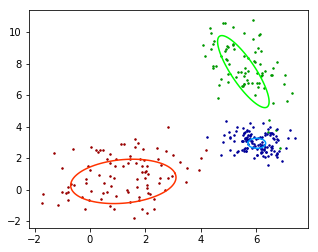

In [297]:
smp = np.zeros((dim, ns))
gs_true = np.zeros(ns)
%matplotlib inline
clrs1 = [(0.6, 0, 0), (0, 0.6, 0), (0, 0, 0.6)]
clrs2 = [(1, 0.2, 0), (0, 1, 0), (0, 0.6, 1)]
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots

for k in range(nm):
    this_smp = np.random.multivariate_normal(mu[k], sg[k], lm_ind[k+1] - lm_ind[k]).T
    smp[:, lm_ind[k]:lm_ind[k + 1]] = this_smp
    gs_true[lm_ind[k]:lm_ind[k + 1]] = multivariate_normal(mu[k], sg[k]).pdf(this_smp.T)
    plt.plot(this_smp[0], this_smp[1], '.', markersize=3, color=clrs1[i])
    elp = contour_ellipse(mu[k], sg[k])
    plt.plot(elp[0], elp[1], color=clrs2[i], ls='-')

L_true = np.log(gs_true).sum() / ns # average log likelihood
print('L_true', L_true)

We have now generated a data set to apply EM algorithm.

In [313]:
mue = 10 * np.random.rand(nm, dim)             # initial mean (to be Estimated)
sge = generate_nice_covariance_for_ellipse(nm) # initial std  (to be Estimated)
lme = np.random.rand(nm)
lme /= lme.sum()                      # initial mixture ratio (to be Estimated)

We now perform EM algorithm on the generated dataset.

L_infer = -5.492553 , L_true = -2.568255
L_infer = -4.039247 , L_true = -2.568255
L_infer = -3.924496 , L_true = -2.568255
L_infer = -3.845697 , L_true = -2.568255
L_infer = -3.746029 , L_true = -2.568255
L_infer = -3.674199 , L_true = -2.568255
L_infer = -3.636315 , L_true = -2.568255
L_infer = -3.612843 , L_true = -2.568255
L_infer = -3.594557 , L_true = -2.568255
L_infer = -3.578288 , L_true = -2.568255
L_infer = -3.563449 , L_true = -2.568255
L_infer = -3.552501 , L_true = -2.568255
L_infer = -3.547957 , L_true = -2.568255
L_infer = -3.547148 , L_true = -2.568255
L_infer = -3.547079 , L_true = -2.568255
L_infer = -3.547075 , L_true = -2.568255


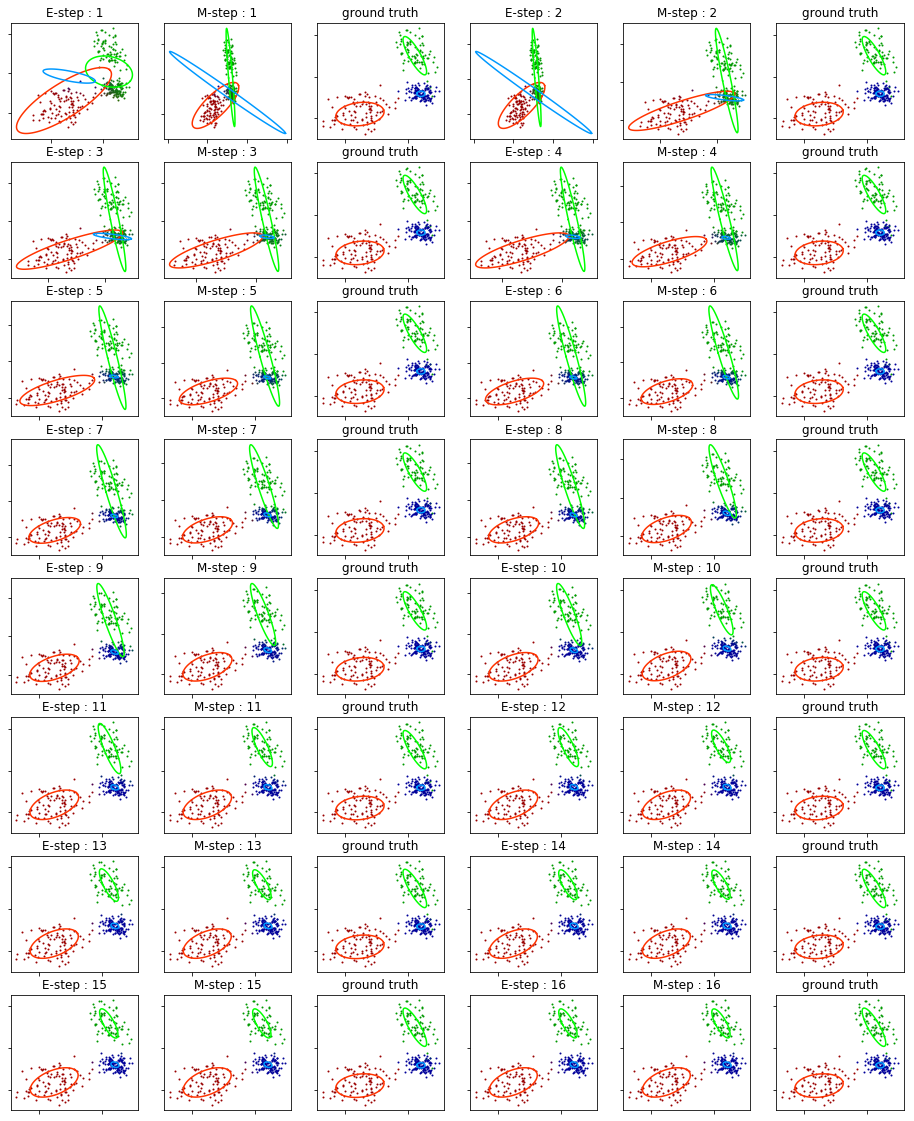

In [314]:
Nrep = 16
plt.rcParams['figure.figsize'] = (16.0, 20.0) # set default size of plots
clr = 0.6
clrs = [(1, 0.2, 0), (0, 1, 0), (0, 0.6, 1)]

# usually the repetition is terminated once the log likelihood saturates.
# For the sake of plotting every step, I use a for loop instead of a while loop.
for rep in range(Nrep):
    
    # E-step
    gs = np.zeros((nm, ns))
    for k in range(nm):
        gs[k, :] = lme[k] * multivariate_normal(mue[k], sge[k]).pdf(smp.T)
    r = gs / gs.sum(axis=0) # sum over classes
    # plot the update
    ax = plt.subplot(Nrep/2, 6, 1 + 3 * rep)
    for i in range(ns):
        cl = (clr*r[0, i], clr*r[1, i], clr*r[2, i])
        plt.plot(smp[0, i], smp[1, i], '.', color=cl, markersize=2)
    for i, c in zip(range(nm), clrs):
        elp = contour_ellipse(mue[i], sge[i])
        plt.plot(elp[0], elp[1], color=c, ls='-')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_title('E-step : %d' % (rep + 1))
        
    # M-step
    lme = r.sum(axis=1)/r.sum()
    for k in range(nm):
        dlts = smp - mue[k][:, np.newaxis]
        sge[i] = np.dot((r[k] * dlts), dlts.T) / r[k].sum()
        mue[i] = (r[k] * smp).sum(axis=1) / r[k].sum()
    # plot the update
    ax = plt.subplot(Nrep/2, 6, 1 + 3 * rep + 1)
    for i in range(ns):
        cl = (clr*r[0, i], clr*r[1, i], clr*r[2, i])
        plt.plot(smp[0, i], smp[1, i], '.', color=cl, markersize=2)
    for i, c in zip(range(nm), clrs):
        elp = contour_ellipse(mue[i], sge[i])
        plt.plot(elp[0], elp[1], color=c, ls='-')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_title('M-step : %d' % (rep + 1))
        
    # plot the ground truth for a comparison
    ax = plt.subplot(Nrep/2, 6, 1 + 3 * rep + 2)
    for i, c in zip(range(nm), clrs):
        this_smp = smp[:, lm_ind[i]:lm_ind[i+1]]
        plt.plot(this_smp[0], this_smp[1], '.', markersize=2, color=clrs1[i])
        elp = contour_ellipse(mu[i], sg[i])
        plt.plot(elp[0], elp[1], color=clrs2[i], ls='-')
        ax.set_title('ground truth')
        ax.set_yticklabels([])
        ax.set_xticklabels([])

    # update the average log likelihood
    L_infer = np.log(gs.sum(axis=0)).sum() / ns # average log likelihood
    print('L_infer = %2.6f , L_true = %2.6f' % (L_infer, L_true))
    


## Gaussian Mixture (continuous mixture in covariance, 2D)
We consider the case of continuous mixtures of 2D Gaussians.
The multivariate t-distribution has pdf
$$\begin{align}
p(\mathbf{x}) \quad = \quad Stud_{\mathbf{x}}(\mu, \Sigma, \nu)
\quad & = & \quad \frac{\Gamma[\frac{\nu+D}{2}]}{(\nu \pi)^{D/2}|\Sigma|^{1/2}\Gamma[\frac{\nu}{2}]} \bigg(1+\frac{(\mathbf{x}_{i} - \mathbf{\mu})^{T}\Sigma^{-1} (\mathbf{x}_{i} - \mathbf{\mu})}{\nu}\bigg)^{-\frac{\nu+D}{2}}\\
\end{align}$$

Notice that the student's t-distribution can be expressed as a marginalization of a gaussian and gamma distribution. Here, $h \in [0, \infty)$.

$$\begin{align}
p(\mathbf{x}|\Theta) \quad & = &\quad \int p(\mathbf{x}|h, \Theta)p(h|\Theta) dh \quad & = & \quad  Stud_{\mathbf{x}}(\mu, \Sigma, \nu)\\
p(\mathbf{x}|h, \Theta) \quad & = &\quad Norm_{\mathbf{x}}(\mu, \Sigma/h) \quad & = & \quad \frac{1}{\sqrt{(2\pi)^{d}|\Sigma/h|}}exp\bigg(-\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^{T}h\Sigma^{-1} (\mathbf{x} - \mathbf{\mu})\bigg)\\
p(h|\Theta) \quad & = & \quad Gam_{h}(\alpha=\nu/2, \beta=\nu/2) \quad & = & \quad \frac{\beta^{\alpha}}{\Gamma(\alpha)}h^{\alpha - 1}exp(-\beta h)
\end{align}$$

Notice that we here consider continuous mixtures as oppose to the discrete mixtures in the previous section. Hence, the res

E-step:
<br>
<br>
$$\begin{align}
q_{i}(h_{i, n + 1}) \quad & = & \quad p(h_{i, n}|x_{i}, \Theta_{n}) \\
& = & \quad \frac{p(x_{i}|h_{i, n}, \Theta_{n})p(h_{i, n}|\Theta_{n})}{\sum_{k=1}^{K}p(x_{i}|h_{i, n}, \Theta_{n})p(h_{i, n}|\Theta_{n})}\\
& = & \quad \frac{Norm_{\mathbf{x}_{i}}(\mu_{n}, \Sigma_{n}/h_{i, n})Gam_{h_{i, n}}(\nu/2, \nu/2)}{p(\mathbf{x}|\Theta_{n})}\\
& = & \quad Gam_{h_{i, n}}\bigg(\frac{\nu_{n} + D}{2}, \frac{(\mathbf{x}_{i} - \mathbf{\mu}_{n})^{T}\Sigma_{n}^{-1} (\mathbf{x}_{i} - \mathbf{\mu}_{n})}{2}+\frac{\nu_{n}}{2}\bigg)\\
\Rightarrow \quad q_{i}(h_{i, n + 1} = h) \quad & = & \quad Gam_{h}\bigg(\frac{\nu_{n} + D}{2}, \frac{(\mathbf{x}_{i} - \mathbf{\mu}_{n})^{T}\Sigma_{n}^{-1} (\mathbf{x}_{i} - \mathbf{\mu}_{n})}{2}+\frac{\nu_{n}}{2}\bigg)\\
 & := & \quad r_{i, n}(h)
\end{align}$$
<br>
M-step:
$$\begin{align}
\Theta_{n + 1}  \quad & = &\quad argmax_{\Theta_{n}}\quad \sum_{i=1}^{N} \int dh_{i, n+1} \, q_{i}(h_{i, n+1})\,log\,p(x_{i}, h_{i, n + 1}|\Theta_{n})\\
\quad & = &\quad argmax_{\Theta}\quad \sum_{i=1}^{N} \int dh\, r_{i, n}(h)\,log\,p(x_{i}, h|\Theta)\\
\quad & = &\quad argmax_{\Theta}\quad \sum_{i=1}^{N} \int dh\, r_{i, n}(h)\,log\,\big( p(x_{i}|h, \Theta)p(h|\Theta)\big)\\
\quad & = &\quad argmax_{\Theta}\quad \sum_{i=1}^{N} \bigg[\int dh\, r_{i, n}(h)\,log\,p(x_{i}|h, \Theta) + \int dh\, r_{i, n}(h)\,log\,p(h|\Theta)\bigg]\\
\quad & = &\quad argmax_{\Theta}\quad \sum_{i=1}^{N} \bigg[E[\,log\,p(x_{i}|h, \Theta)] + E[log\,p(h|\Theta)]\bigg]\\
\end{align}$$
<br>
We find the followings.
<br>
$$\begin{align}
E[log\,p(x_{i}|h_{i}, \Theta_{n})] \quad & = &\quad \frac{1}{2}\bigg[DE[logh_{i}] - Dlog2\pi -log|\Sigma_{n}| - (\mathbf{x}_{i} - \mathbf{\mu}_{n})^{T}\Sigma_{n}^{-1} (\mathbf{x}_{i} - \mathbf{\mu}_{n})E[h_{i}]\bigg]\\
E[log\,p(h_{i}|\Theta_{n})] \quad & = &\quad \frac{\nu_{n}}{2}log\frac{\nu_{n}}{2} - log\Gamma\bigg[\frac{\nu_{n}}{2}\bigg] + \bigg(\frac{\nu_{n}}{2}-1\bigg)E[logh_{i}] - \frac{\nu_{n}}{2}E[h_{i}]\\
E[logh_{i}] \quad & = &\quad \Psi\bigg[\frac{\nu_{n}+D}{2}\bigg] - log\bigg[\frac{\nu_{n} + (\mathbf{x}_{i} - \mathbf{\mu}_{n})^{T}\Sigma_{n}^{-1} (\mathbf{x}_{i} - \mathbf{\mu}_{n})}{2}\bigg]\\
E[h_{i}] \quad & = &\quad \frac{\nu_{n} + D}{\nu_{n} + (\mathbf{x}_{i} - \mathbf{\mu}_{n})^{T}\Sigma_{n}^{-1} (\mathbf{x}_{i} - \mathbf{\mu}_{n})}
\end{align}$$
<br>
To find the optimized values for $\Theta$ for this step, we need to take the derivative of each parameter of $\Theta$ and set it to zero. After some arithmetics (there are cancellations that give rise to the following simple closed for in the end), we find the following updates.<br>
$$\begin{align}
\mathbf{\mu}_{n + 1} \quad & = & \quad \frac{\sum_{i=1}^{N}E[h_{i}] \mathbf{x}_{i}}{\sum_{i=1}^{N}E[h_{i}]} \\
\Sigma_{n + 1} \quad & = & \quad \frac{\sum_{i=1}^{N}E[h_{i}](\mathbf{x}_{i} - \mu_{n})^{T}(\mathbf{x}_{i} - \mu_{n})}{\sum_{i=1}^{N}E[h_{i}]} \\
\end{align}$$
Unfortunately, $\nu$ does not give rise to a simple closed form for the update.

##  Implementation of Gaussian Mixture (continuous mixture in covariance, 2D)


## Gaussian Mixture (continuous mixture in mean as Factor analysis)


$$\begin{align}
p(h_{i}|\Theta) \quad & = & \quad Stud_{\mathbf{x}}(\mu, \Sigma, \nu)\\
\quad & = & \quad \frac{\Gamma[\frac{\nu+D}{2}]}{(\nu \pi)^{D/2}|\Sigma|^{1/2}\Gamma[\frac{\nu}{2}]} \bigg(1+\frac{(\mathbf{x}_{i} - \mathbf{\mu})^{T}\Sigma^{-1} (\mathbf{x}_{i} - \mathbf{\mu})}{\nu}\bigg)^{-\frac{\nu+1}{2}}\\
\end{align}$$

Notice that the student's t-distribution can be expressed as a marginalization of a gaussian and gamma distribution. 

$$\begin{align}
p(x_{i}|h_{i}, \Theta) \quad & = &\quad Norm_{\mathbf{x}_{i}}(\mu_{h_{i}}, \Sigma_{h_{i}}) \quad & = & \quad \frac{1}{\sqrt{(2\pi)^{d}|\Sigma|}}exp\bigg(-\frac{1}{2}(\mathbf{x}_{i} - \mathbf{\mu}_{h_{i}})^{T}\Sigma_{h_{i}}^{-1} (\mathbf{x}_{i} - \mathbf{\mu}_{h_{i}})\bigg)\\
p(h_{i}|\Theta) \quad & = & \quad Gam_{\mathbf{h}_{i}}(\alpha, \beta) \quad & = & \quad \frac{\beta^{\alpha}}{\Gamma(\alpha)}exp(\beta h_{i})h^{\alpha - 1}
\end{align}$$


E-step:
<br>
<br>
$$\begin{align}
q_{i}(h_{i, k, n + 1}) \quad & = & \quad p(h_{i, k, n}|x_{i}, \Theta_{n}) \\
& = & \quad \frac{p(x_{i}|h_{i, k, n}, \Theta_{n})p(h_{i, k, n}|\Theta_{n})}{\sum_{k=1}^{K}p(x_{i}|h_{i, k, n}, \Theta_{n})p(h_{i, k, n}|\Theta_{n})}\\
& = & \quad \frac{\lambda_{k, n}Norm_{\mathbf{x}_{i}}(\mu_{k, n}, \Sigma_{k, n})}{\sum_{k=1}^{K}\lambda_{k, n}Norm_{\mathbf{x}_{i}}(\mu_{k, n}, \Sigma_{k, n})}\\
& := & r_{ik}
\end{align}$$
<br>
M-step:
<br>
<br>
$$\begin{align}
\lambda_{k, n + 1}  \quad & = & \quad \frac{\sum_{i=1}^{N}r_{ik}}{\sum_{k=1}^{K}\sum_{i=1}^{N}r_{ik}}\\
\mu_{k, n + 1}  \quad & = & \quad \frac{\sum_{i=1}^{N}r_{ik}x_{i}}{\sum_{i=1}^{N}r_{ik}} \\
\Sigma_{k, n + 1}  \quad & = & \quad \frac{\sum_{i=1}^{N}r_{ik}(\mathbf{x}_{i} - \mu_{k, n})^{T}(\mathbf{x}_{i} - \mu_{k, n})}{\sum_{i=1}^{N}r_{ik}} \\
\end{align}$$

##  Implementation of Gaussian Mixture (continuous mixture in mean, 1D)



## Student's-T Mixture 

